## Day 3 recap

Our long term goal is to understand which translation surfaces have a convex presentation. An intermediate step in that direction is understanding the cylinder decomposition of the given translation surface in various directions. Here's an example that we have seen before. Consider the origami $T$ made out of $3$ squares.

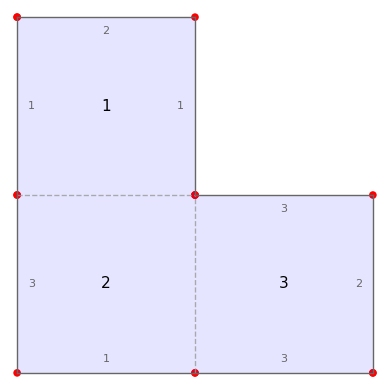

In [1]:
from surface_dynamics.all import Origami # Setting up the imports

T_up_permutation = '(1, 2)' # We are using cycle notation for permutation.
T_right_permutation = '(2, 3)'

T = Origami(T_right_permutation, T_up_permutation)

T.set_positions([(0,2), (0,1), (1,1)])
T.plot()

We deduced that $T$ has a convex presentation by observing that in the $\frac{3\pi}{4}$ direction, there is only one cylinder. An equivalent way of deducing that would have been to rotate $T$ by $-\frac{3\pi}{4}$, and the count the number of horizontal cylinders. The resulting translation surface isn't quite an origami generated by area 1 squares, but is, after scaling.

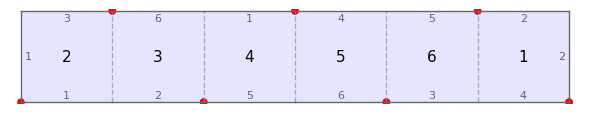

In [2]:
RT_up_permutation = '(1, 2, 3, 6, 5, 4)'
RT_right_permutation = '(1, 2, 3, 4, 5, 6)'

RT = Origami(RT_right_permutation, RT_up_permutation)

RT.plot()

Clearly, $RT$ has only one horizontal cylinder, as evident from the plot. One can also check that without plotting the picture.

In [3]:
RT.num_cylinders()

1

Of course it's not true that for any translation surface with a convex presentation, one can find a one-cylinder direction, but knowing how the surface decomposes as a cylinder in various directions is still useful.

**Proposition 3 from Lelièvre-Weiss**: If a translation surface $S$ has a convex presentation as a $2n$-gon, then it contains a cylinder satisfying a certain number of properties that can be checked...

This paraphrasing also suggests that it will be convenient to get the cylinder decomposition of surface in any direction we like.

## Working with origamis

When performing computations on a computer, it will be convenient to work with origamis rather than a general translation surface. That's because specifying an arbitrary translation surface of genus $g$ with $n$ cone points requires specifying $4g + 2n - 2$ real numbers. However, real numbers are hard to represent exactly on a computer, since they are given by infinite sequences of rational numbers. We will compromise by considering only those translation surfaces which can be represented with $4g +2n - 2$ rational numbers, and those are precisely origamis.

Recall that an $n$-origami is specified by considering $n$-squares, labelled $[1, \ldots, n]$, and specifying how the right and top edge are glued together. That is to say, an $n$-origami can be specifed with the tuple $(\pi_r, \pi_u)$, where $\pi_r \in S_n$ is a permutation specifying how the right edges are glued, and $\pi_u$ is a permutation specifying how the top edges are glued. In Sage, the most convenient way of representing a permutation is using the cycle notation (**interrupt me if you'd like a refresher on cycle notation**).

## $SL_2(\mathbb{Z})$-action on $n$-origamis

Since origamis are translation surfaces, one has a $GL_2(\mathbb{R})$ action on them. However, it's not guaranteed that origamis will get sent to origamis. We saw three examples of such matrices last week, although the proof of that fact was left as an exercise. 

But if we restrict our attention to elements of $SL_2(\mathbb{Z})$, then origamis indeed do get sent to origamis. Consider the following two matrices.

- $S = \begin{pmatrix}
    1 & 1 \\
    0 & 1
  \end{pmatrix}$: Shearing in the horizontal direction.
- $R = \begin{pmatrix}
    0 & -1 \\
    1 & 0
  \end{pmatrix}$: Rotation anticlockwise by $\frac{\pi}{2}$ radians.

We can work out what $R$ does to an origami $(\pi_r, \pi_u)$ by observing what it does to a single square. It rotates it so that the original right is the new up, and the original up is the new left. That is to say that the up and left permutations of a the new origami are the right and up permutations of the original origami. Also note that for any origami, the left and right permutations are inverses. We thus get a formula for the action of $R$.
$$R((\pi_r, \pi_u)) = (\pi_u^{-1}, \pi_r)$$
Working out a similar formula for the action of $S$ was an exercise. It works out to be the following.
$$S((\pi_r, \pi_u)) = (\pi_r, \pi_u \pi_r^{-1})$$

The actions of $S$ and $R$ are already implemented in `surface_dynamics`. See last week's Jupyter notebook for the actual method names.

**Fact:** One can represent any element of $SL_2(\mathbb{Z})$ as a product of copies of $S$, $S^{-1}$ and $R$.

**Exercise**: Implement the algorithm to factor elements of $SL_2(\mathbb{Z})$ into products of $S$, $S^{-1}$ and $R$. Once you have done so, write a function `sl2_action(matrix, origami)` that takes in a `matrix` in $SL_2(\mathbb{Z})$ and an origami, and outputs the origami which is the result of making `matrix` act on origami. Note that this has not been implemented in `surface_dynamics`, so if you manage to write a nice efficient implementation, you can contribute it upstream.

## Rotations of origamis

Observe that $SL_2(\mathbb{Z})$ action isn't flexible enough for our purposes. The only rotations it allows are rotations by integer multiples of $\frac{\pi}{2}$, whereas we would like rotations by more angles, like $\frac{\pi}{4}$, like we did in the first example today. More concretely, we will rotate and scale for convenience: the matrix we want to act by is $M = \begin{pmatrix}1 & -1 \\ 1 & 1\end{pmatrix}$.

**Exercise**: Determine how the permutation data of an origami changes when acted upon by $M$. Note that this matrix turns an $n$-origami into a $2n$-origami, which means we will map a pair $(\pi_r, \pi_u) \in S_n \times S_n$ to an element $(\widetilde{\pi}_r, \widetilde{\pi}_u) \in S_{2n} \times S_{2n}$.